Author: 李武丹
Group：9
ID:3120301269
Python编程课大作业
全球新冠疫情数据网页抓取和可视化

In [1]:
# 导入模块
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 向网站索取数据
url = 'https://www.worldometers.info/coronavirus/'
r = requests.get(url)

In [3]:
# 解析成beautiful soup
data = r.text
soup = BeautifulSoup(data,'html.parser')

In [4]:
# 打印基本数据
print(soup.title.text)
print()
live_data = soup.find_all('div',id='maincounter-wrap')
for i in live_data:
    print(i.text)



Coronavirus Update (Live): 96,625,755 Cases and 2,065,698 Deaths from COVID-19 Virus Pandemic - Worldometer


Coronavirus Cases:

96,625,755 



Deaths:

2,065,698



Recovered:

69,274,079




In [5]:
# 提取数据
table_body = soup.find('tbody')
table_rows = table_body.find_all('tr')
countries = []
cases = []
todays = []
deaths = []

In [6]:
for tr in table_rows:
    td = tr.find_all('td')
    countries.append(td[1].text)
    cases.append(td[2].text)
    todays.append(td[3].text)
    deaths.append(td[4].text)

In [7]:
indices = [i for i in range(1,len(countries)+1)]
headers = ['Countries','Total Cases','Todays Cases','Total Deaths']
df = pd.DataFrame(list(zip(countries,cases,todays,deaths)),index=indices,columns=headers)

In [8]:
print(df)

             Countries Total Cases Todays Cases Total Deaths
1    \nNorth America\n  28,330,138      +20,024      594,461
2             \nAsia\n  22,199,678       +3,672      358,954
3    \nSouth America\n  14,816,205       +2,357      392,073
4           \nEurope\n  27,904,996                   638,185
5           \nAfrica\n   3,324,351                    80,938
..                 ...         ...          ...          ...
225  Wallis and Futuna           4                          
226              Samoa           2                          
227         Micronesia           1                          
228            Vanuatu           1                          
229              China      88,557         +103       4,635 

[229 rows x 4 columns]


In [9]:
#改变数据框架并打印出表中的前30个国家
df30 = df.head(30)

In [10]:
df30

,Countries,Total Cases,Todays Cases,Total Deaths
1,\nNorth America\n,"28,330,138","+20,024","594,461"
2,\nAsia\n,"22,199,678","+3,672","358,954"
3,\nSouth America\n,"14,816,205","+2,357","392,073"
4,\nEurope\n,"27,904,996",,"638,185"
5,\nAfrica\n,"3,324,351",,"80,938"
6,\nOceania\n,"49,666",+15,"1,072"
7,\n\n,721,,15
8,World,"96,625,755","+26,068","2,065,698"
9,USA,"24,806,964",,"411,486"
10,India,"10,596,442",,"152,754"


In [11]:
#定义输出指定国家的数据的函数
def showCountry(cn):
    checkcn = df['Countries'] == cn
    data = df[checkcn]
    print(data.head())


In [12]:
c1 = input('Enter country name : ').title()
showCountry(c1)

   Countries Total Cases Todays Cases Total Deaths
10     India  10,596,442                  152,754 


In [13]:
#将整个数据保存到csv文件中
df.to_csv('corona-virus-cases.csv')

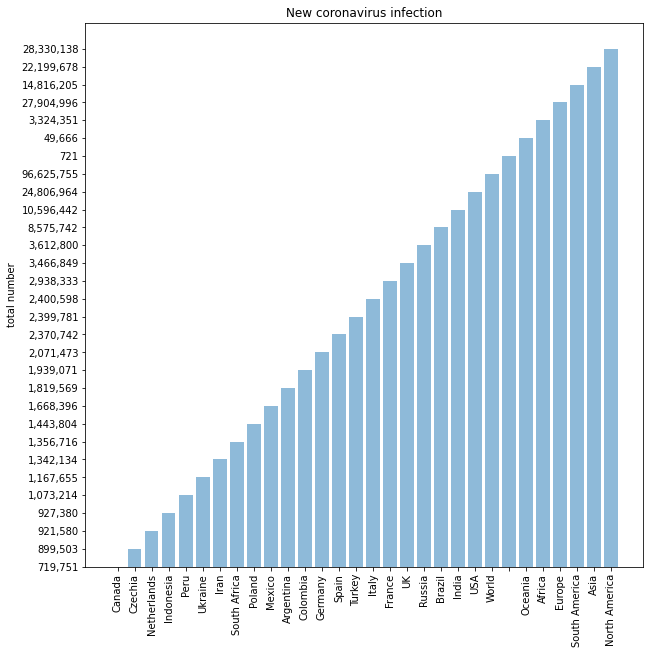

In [17]:
#绘制出病例最多的30个国家的图表
cases_sliced = cases[:30]
countries_sliced = countries[:30]

y_pos = list(range(len(countries_sliced)))


plt.figure(figsize = (10,10))
plt.bar(y_pos,cases_sliced[::-1],align='center',alpha=0.5)
plt.xticks(y_pos,countries_sliced[::-1],rotation=90)
plt.ylabel('total number')
plt.title('New coronavirus infection')
plt.savefig('coronavirus-analysis.png',dpi=600)
plt.show()

In [66]:
#从不同的csv文件收集数据
confirmed = pd.read_csv('covid19_confirmed.csv')
deaths = pd.read_csv('covid19_deaths.csv')
recovered = pd.read_csv('covid19_recovered.csv')
print(confirmed.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  \
0        0        0        0  ...    2469    2704    2894    3224    3392   
1        0        0        0  ...     789     795     803     820     832   
2        0        0        0  ...    4295    4474    4648    4838    4997   
3        0        0        0  ...     747     748     750     751     751   
4        0        0        0  ...      35      35      35      36      36   

   5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  
0    3563 

如上，前四列包括国家或地区、省或州等数据。
在前四列之后，我们有当天的日期和各自的确诊病例(死亡数、康复数)。

为了简单起见，我们将删除' Province/State '列，并将同一国家的所有行值相加。我们还要去掉Lat和Long列，也就是坐标。之后，我们还要对数据帧进行转置。这意味着我们希望将日期作为行，将国家作为列。

In [67]:

confirmed = confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths = deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered = recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)

confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')
recovered = recovered.groupby(recovered['Country/Region']).aggregate('sum')

confirmed = confirmed.T
deaths = deaths.T
recovered = recovered.T

In [68]:
#计算关键统计数据
new_cases = confirmed.copy()

for day in range(1, len(confirmed)):
    new_cases.iloc[day] = confirmed.iloc[day] - confirmed.iloc[day - 1]

growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day - 1]) * 100

active_cases = confirmed.copy()

for day in range(0, len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - recovered.iloc[day]

overall_growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day-1]) / active_cases.iloc[day - 1]) * 100

death_rate = confirmed.copy()

for day in range(0, len(confirmed)):
    death_rate.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100

有了这些数据，我们可以计算出很多不同的附加值。例如，由于我们有死亡人数和确诊病例，我们可以按国家计算死亡率。同样的道理也可以用在恢复上。同样，通过观察确诊病例，我们可以在某天回顾并计算死亡和确诊病例的增长率。我们还可以通过从确诊病例中减去死亡和康复数来计算现存病例数。

In [69]:
hospitalization_rate_estimate = 0.05

hospitalization_needed = confirmed.copy()

for day in range(0, len(confirmed)):
    hospitalization_needed.iloc[day] = active_cases.iloc[day] * hospitalization_rate_estimate

In [70]:
estimated_death_rate = 0.03
print(deaths['Italy'].tail()[4] / estimated_death_rate)

1024633.3333333334


进行一些可视化，看看这些数据实际上是什么样子的。
首先，我们将绘制多个国家的确诊病例总数。

No handles with labels found to put in legend.


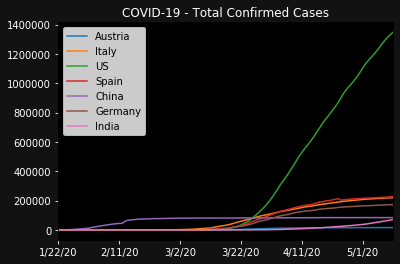

In [71]:
#visualizing the data
ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 - Total Confirmed Cases', color='white')
ax.legend(loc="upper left")

countries = ['Austria', 'Italy', 'US', 'Spain', 'China', 'Germany', 'India']

for country in countries:
    confirmed[country][0:].plot(label = country)

plt.legend(loc='upper left')
plt.show()

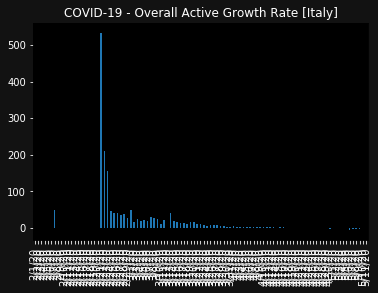

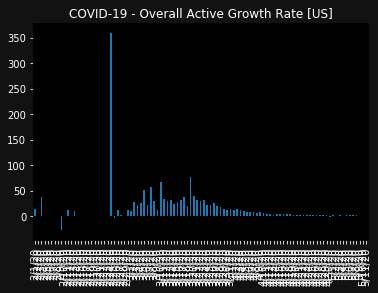

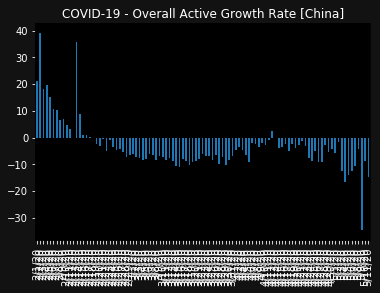

In [72]:
countries = ['Italy', 'US', 'China']

for country in countries:
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_title(f'COVID-19 - Overall Active Growth Rate [{country}]', color='white')
    overall_growth_rate[country][10:].plot.bar()
    plt.show()

在像我们中国这样的少数国家，可以看到一个负增长，这意味着不仅人们生病的速度变慢了，而且现存病例的数量每天都在减少。

In [73]:
#运行模拟
simulation_growth_rate = 0.1

dates = pd.date_range(start='5/13/2020', periods=40, freq='D')
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%Y')

simulated = confirmed.copy()
simulated = simulated.append(pd.DataFrame(index=dates))

for day in range(len(confirmed), len(confirmed)+40):
    simulated.iloc[day] = simulated.iloc[day - 1] * (simulation_growth_rate + 1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


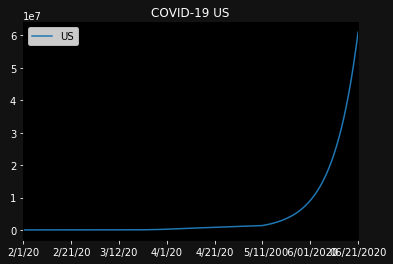

In [74]:
ax = simulated['US'][10:].plot(label="US")
ax.set_axisbelow(True)
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 US', color='white')
ax.legend(loc="upper left")

plt.show()

美国受感染的人数将达到3000万。当然，这并没有考虑到任何应对措施。此外，这个公式没有考虑到人口规模等自然限制。如果你选择20%并且运行更长时间，你感染的美国人会比地球上的人口还多。因此，这种模拟是不准确的。但是你也可以用这样的方法。